# Course: Data Science

# Project: Regression

# Worked By: Rifat Jahan Lia, M1,Iot

# Step 1: Importing the necessary libraries and loading the dataset
I have used the forestfires.csv dataset for this project. The link of the dataset is here: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/

In [46]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('/Users/NC/Documents/M1-Semester2/Data Science/Prf. Guyeux Christophe/TP/Regression/forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Step 2: Data Exploration and Cleaning

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


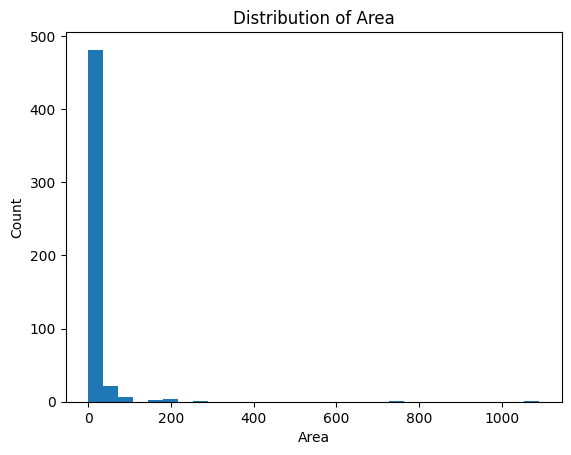

In [49]:
# Exploring the dataset
print(df.head())

# Checking for missing values
print(df.isnull().sum())

# Checking the data types
print(df.dtypes)

# Checking the distribution of target variable 'area'
plt.hist(df['area'], bins=30)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Distribution of Area')
plt.show()

# Step 3: Data Preprocessing and Feature Engineering

In [50]:
# Transforming the target variable 'area'
df['area'] = np.log1p(df['area'])

# Encoding the categorical variables
df = pd.get_dummies(df, columns=['month', 'day'])

# Splitting the data into training and testing sets
X = df.drop('area', axis=1)
y = df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Applying Regression Algorithms and Evaluation

Regression Models/Algorithms: We will compare the following regression models:

1.Linear Regression 
2.Decision Tree Regression 
3.Random Forest Regression 
4.Support Vector Regression

Evaluation Metrics: We will use the following evaluation metrics to evaluate the performance of each model:

1.R-squared (R2) score
2.Mean Absolute Error (MAE)
3.Mean Squared Error (MSE) 
4.Root Mean Squared Error (RMSE) 

# Linear Regression 

In [53]:
# Training the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print('Linear Regression:')
print('R-squared:', r2_lr)
print('MAE:', mae_lr)
print('MSE:', mse_lr)
print('RMSE:', rmse_lr)

Linear Regression:
R-squared: -0.047159971473464735
MAE: 1.2021068569055382
MSE: 2.3015126614710275
RMSE: 1.517073716557975


# Decision Tree Regression

In [54]:
# Training the decision tree regression model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print('Decision Tree Regression:')
print('R-squared:', r2_dt)
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

Decision Tree Regression:
R-squared: -0.6568375591762168
MAE: 1.2772990615918265
MSE: 3.6414996030445987
RMSE: 1.9082713651482062


# Random Forest 

In [55]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('Random Forest Regression:')
print('R-squared:', r2_rf)
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)
print()


Random Forest Regression:
R-squared: -0.05511565500530424
MAE: 1.2012913805939271
MSE: 2.3189981525879397
RMSE: 1.5228257131359253



# Regression Support Vector Regression

In [56]:
# Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print('Support Vector Regression:')
print('R-squared:', r2_svr)
print('MAE:', mae_svr)
print('MSE:', mse_svr)
print('RMSE:', rmse_svr)

Support Vector Regression:
R-squared: -0.21295364252565085
MAE: 1.122670876975526
MSE: 2.665904200025973
RMSE: 1.632759688388335


# Step 5: Comparisom among the Regression Algorithms based on R-squared Scores

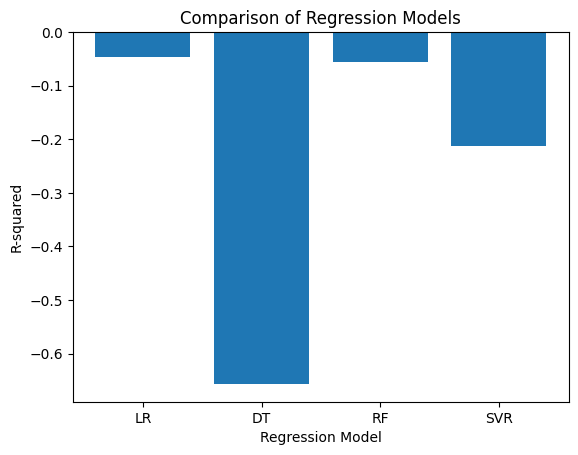

In [57]:

# R-squared scores for each model
r_squared = [r2_lr, r2_dt, r2_rf, r2_svr]

# Model names
models = ['LR', 'DT', 'RF', 'SVR']

# Creating bar chart
plt.bar(models, r_squared)

# Adding labels and title
plt.xlabel('Regression Model')
plt.ylabel('R-squared')
plt.title('Comparison of Regression Models')

# Displaying 
plt.show()

# Step 6: Comparisom among the Regression Algorithms based on Mean Absolute Error (MAE) 

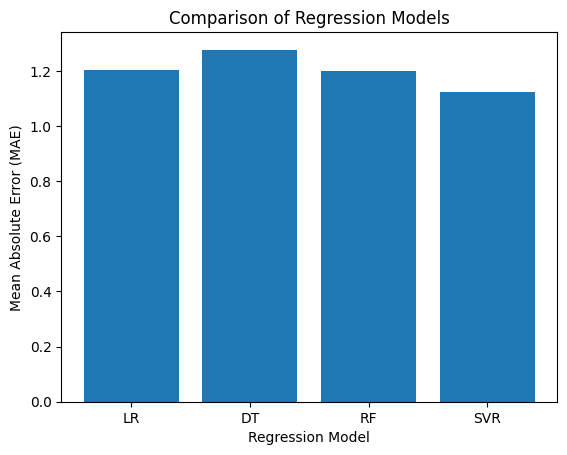

In [58]:
# mae for each model
#mae = [1.202, 1.277, 1.201,  1.123]
mae = [mae_lr, mae_dt, mae_rf, mae_svr]
    
# Model names
models = ['LR', 'DT', 'RF', 'SVR']

# Creating bar chart
plt.bar(models, mae)

# Adding labels and title
plt.xlabel('Regression Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Regression Models')

# Displaying
plt.show()

# Step 7: Comparisom among the Regression Algorithms based on Mean Squared Error (MSE)

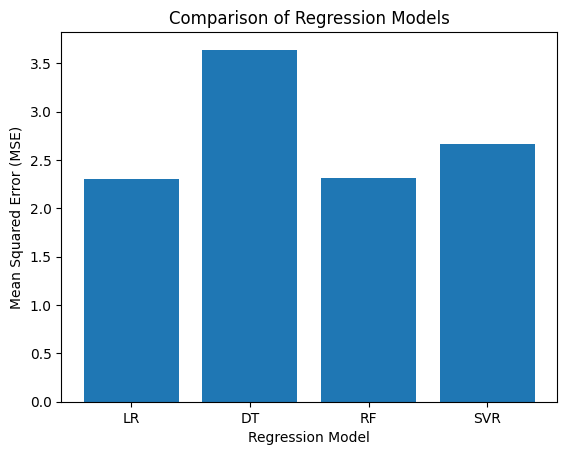

In [59]:
# mse for each model
#mse = [2.302, 3.641, 2.319,  2.666]
mse = [mse_lr, mse_dt, mse_rf, mse_svr]
    
# Model names
models = ['LR', 'DT', 'RF', 'SVR']

# Creating bar chart
plt.bar(models, mse)

# Adding labels and title
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models')

# Displaying
plt.show()

# Step 8: Comparisom among the Regression Algorithms based on Root Mean Squared Error (RMSE)

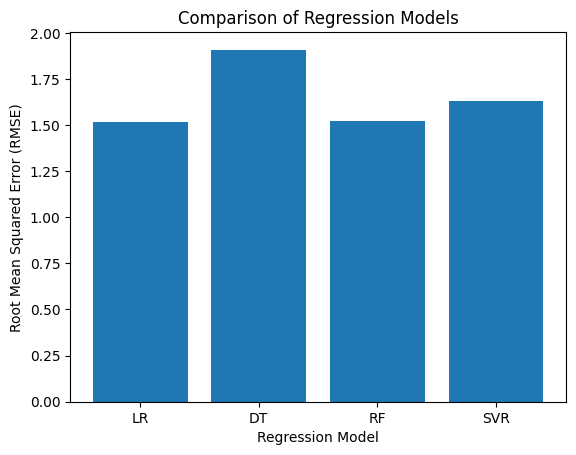

In [61]:
# rmse for each model
#rmse = [1.517, 1.908, 1.523, 1.633]
rmse = [rmse_lr, rmse_dt, rmse_rf, rmse_svr]
    
# Model names
models = ['LR', 'DT', 'RF', 'SVR']

# Creating bar chart
plt.bar(models, rmse)

# Adding labels and title
plt.xlabel('Regression Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Regression Models')

# Displaying
plt.show()

# Step 9: Comapring all algorithms results based on R2_score, mae, mse, rmse

In [62]:
# Creating a table of the evaluation metrics for each model
data = {'Linear Regression': [r2_lr, mse_lr, rmse_lr, mae_lr],
        'Decision Tree Regression': [r2_dt, mse_dt, rmse_dt, mae_dt],
        'Random Forest Regression': [r2_rf, mse_rf, rmse_rf, mae_rf],
        'Support Vector Regression': [r2_svr, mse_svr, rmse_svr, mae_svr] }
        
metrics = pd.DataFrame(data, index=['R-squared', 'MSE', 'RMSE', 'MAE'])

print(metrics)

           Linear Regression  Decision Tree Regression  \
R-squared          -0.047160                 -0.656838   
MSE                 2.301513                  3.641500   
RMSE                1.517074                  1.908271   
MAE                 1.202107                  1.277299   

           Random Forest Regression  Support Vector Regression  
R-squared                 -0.055116                  -0.212954  
MSE                        2.318998                   2.665904  
RMSE                       1.522826                   1.632760  
MAE                        1.201291                   1.122671  


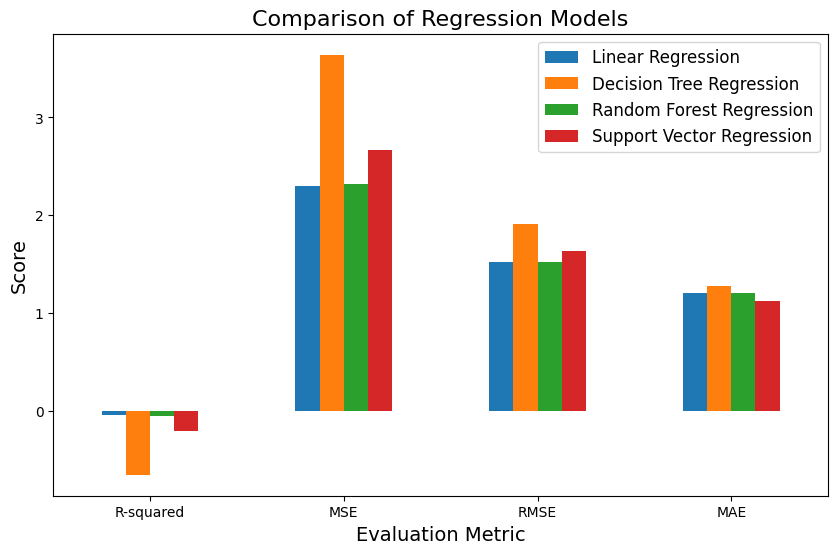

In [63]:
# Creating a bar chart of the evaluation metrics
metrics.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Regression Models', fontsize=16)
plt.xlabel('Evaluation Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=0)
plt.legend(fontsize=12)
plt.show()

# Step 10: Findings and Conclusion

From the comparisom among the results from evaluation metrics R-squared, MAE, MSE and RMSE, Dicistion Tree give the best result for every evaluation metric. So, we declear Dicition Tree as the best Regression algorithm for this.